In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
values = pd.read_csv('results.csv')

In [3]:
values

,Website,tcp,Time for transfer,Delay,Bandwidth
0,flipkart,tcp fast_open,0.12,20,1
1,flipkart,vanilla,0.20,20,1
2,flipkart,tcp fast_open,0.12,20,2
3,flipkart,vanilla,0.20,20,2
4,flipkart,tcp fast_open,0.12,20,5
5,flipkart,vanilla,0.20,20,5
6,flipkart,tcp fast_open,0.12,20,10
7,flipkart,vanilla,0.20,20,10
8,flipkart,tcp fast_open,0.60,100,1
9,flipkart,vanilla,1.00,100,1


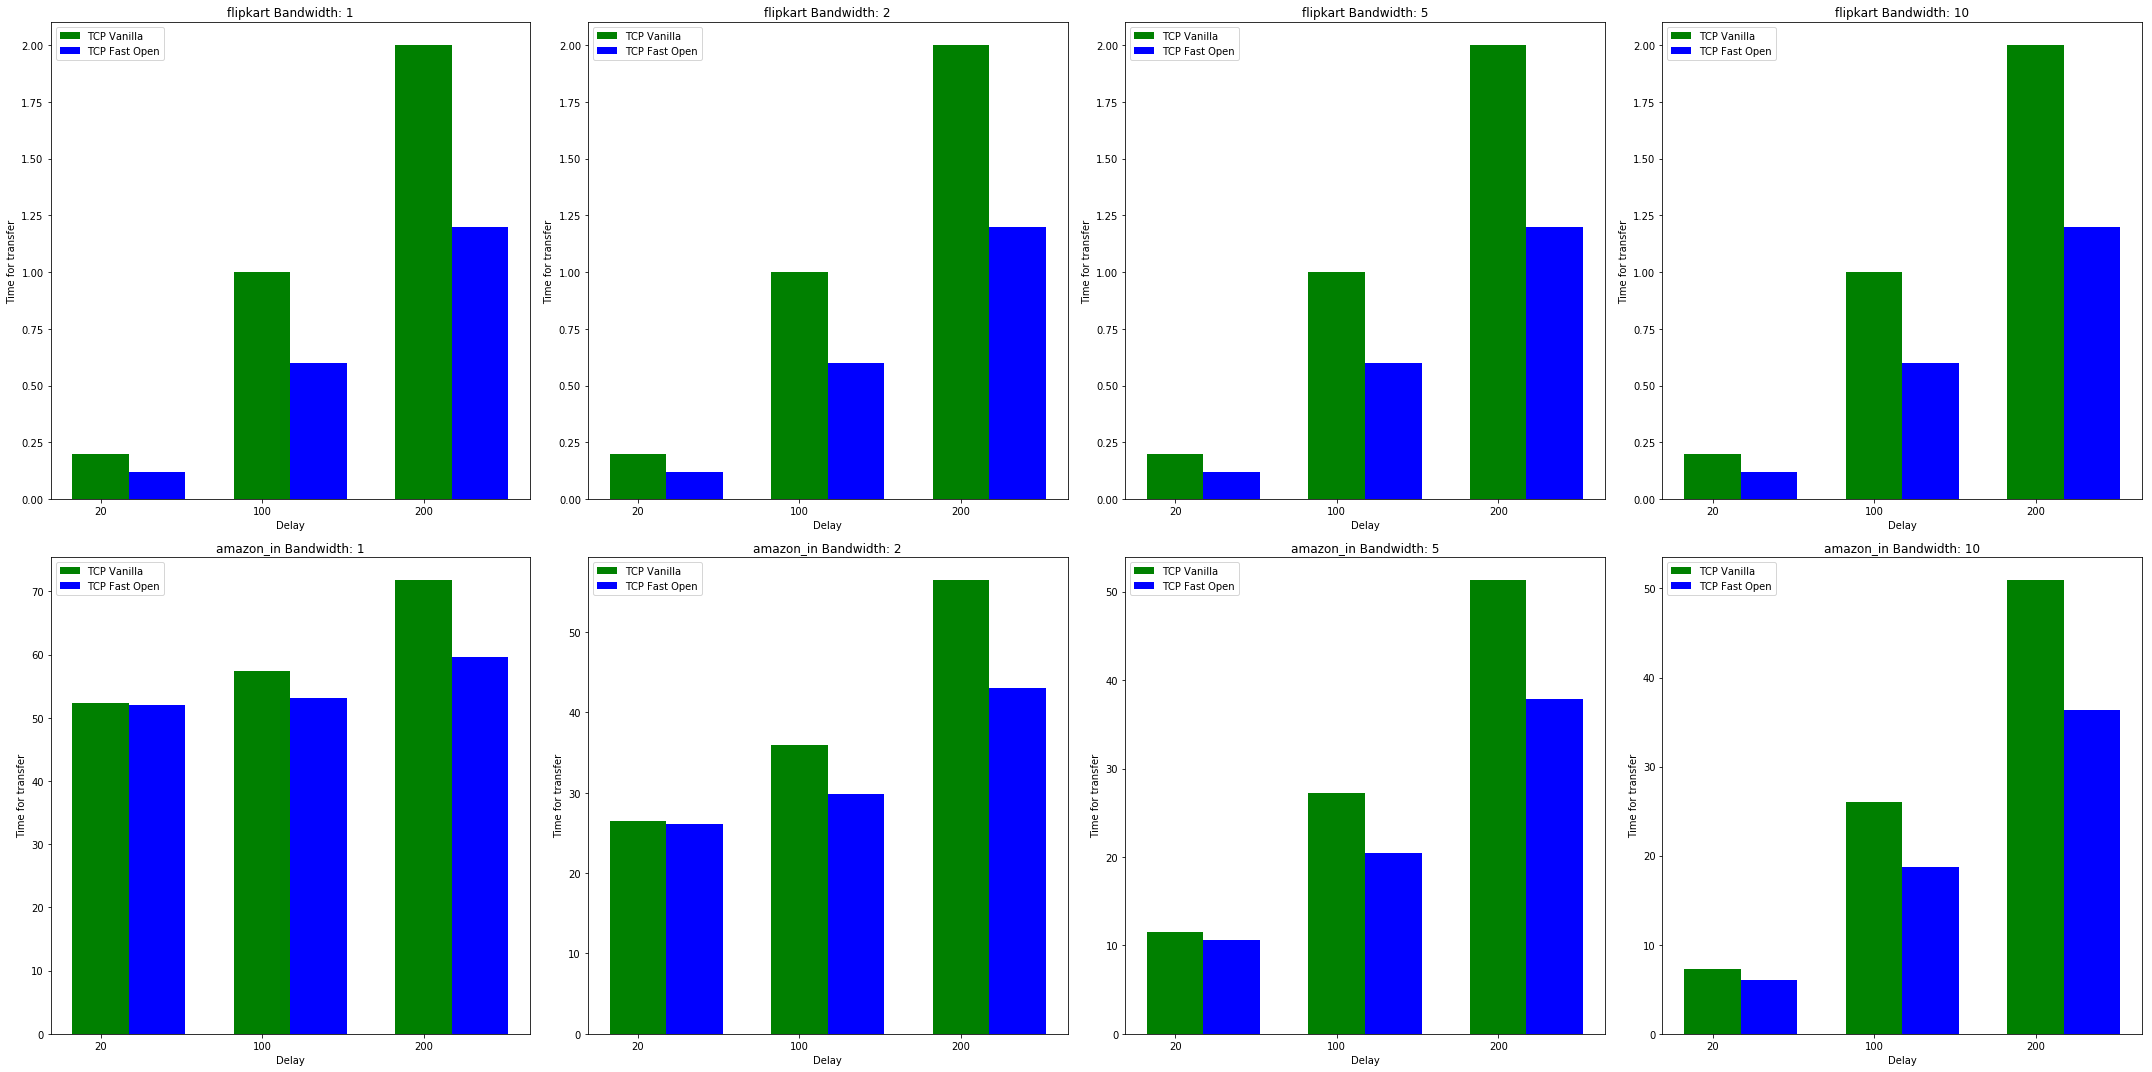

In [4]:
websites = values.Website.unique()
delays = np.array(values.Delay.unique())
delays.sort()
bandwidth = np.array(values.Bandwidth.unique())
bandwidth.sort()
fig, ax = plt.subplots(ncols = bandwidth.shape[0],nrows = websites.shape[0], figsize=(30, 15))
x = 0
y = 0
width = 0.35
#fig.subplots_adjust(hspace=0.5)
for website in websites:
    for bw in bandwidth:
        ip = values[values.Website == website]
        ip1 = ip[ip.tcp =='vanilla']
        ip1 = ip1[ip1.Bandwidth == bw]
        ip2 = ip[ip.tcp =='tcp fast_open']
        y_pos = np.arange(ip1.shape[0])
        ip2 = ip2[ip2.Bandwidth == bw]

        rects1 = ax[x][y].bar(y_pos, ip1['Time for transfer'],width, color='g')

        rects2 = ax[x][y].bar(y_pos + width, ip2['Time for transfer'],width, color='b')

        ax[x][y].set_ylabel("Time for transfer")
        ax[x][y].set_xlabel("Delay")
        ax[x][y].set_title(website + " Bandwidth: " + str(bw))
        ax[x][y].set_xticks(y_pos)
        ax[x][y].set_xticklabels(delays)
        ax[x][y].legend((rects1[0], rects2[0]), ('TCP Vanilla', 'TCP Fast Open'))
        y = y + 1
    x = x + 1
    y = 0
plt.tight_layout()
plt.show()
fig.savefig("plots.png")